# 👤 Personal Information
Name: **Sinem Ertem**

StudentID: **14616068**

Email: [**sinem.ertem@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **DD.MM.YYYY**

# 📊 Data Context
**Nationaal Archief <a name="NA"></a>[<sup>[1]</sup>](#NA) is the Netherlands' official archive, responsible for preserving the country's historical documents and records. It is the largest archive in the country, with holdings dating back to the Middle Ages. Similarly, they have documents from the Dutch United East India Company (Verenigde Oostindische Compagnie or VOC). The VOC, founded in 1602, was unquestionably the most thriving of all trading companies in the seventeenth and eighteenth centuries <a name="Gaastra2007"></a>[<sup>[2]</sup>](#Gaastra2007)**


**VOC's archives provide a unique insight into the history of early modern Europe and the wider world. They contain records of business activities, such as trade contracts, shipping records, and financial accounts. They also include detailed accounts of the day-to-day life of the VOC and its employees. This wealth of information allows us to better understand the dynamics of early modern global trade and colonialism. Additionally, the archives provide an insight into the experiences of the people who lived and worked in the Dutch East Indies, including the effects of colonization on the local population and their interactions with Dutch merchants and traders.**

**Luthra et al. <a name="luthra"></a>[<sup>[3]</sup>](#luthra) released a corpus of nearly 70,000 annotations as a shared task, for which they provide strong baselines using state-of-the-art neural network models. The Data Card <a name="dc"></a>[<sup>[4]</sup>](#dc) provides a synopsis of the dataset, motivations and uses. The dataset will be further analyzed in this notebook.**

## NLP

**A way to better understand these historical archives is by Natural Language Processing (NLP). The domain of NLP, which is also known as computational linguistics, incorporates the engineering of computer models and processes to tackle such practically-oriented problems in understanding human languages.**

**This research paper will delve into extracting useful information from text, more specifically, NER. NER corresponds to the identification of entities of interest in texts, generally of the types Person, Organisation and Location. Such entities serve as reference points that form the meaning of text and assist in its interpretation.**

[1] https://www.nationaalarchief.nl/en \
[2] https://www.nationaalarchief.nl/sites/default/files/afbeeldingen/toegangen/NL-HaNA_1.04.02_introduction-VOC.pdf \
[3] https://www.emerald.com/insight/content/doi/10.1108/JD-02-2022-0038/full/html \
[4] https://github.com/budh333/UnSilence_VOC/blob/main/Datacard.pdf

<!-- ![image](img/dataset_snapshot.png) -->

# 📄 Data Description

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from glob import glob
from preprocessing import clean_text as clean_text_func
# !pip3 install spacy
# !python3 -m spacy download nl_core_news_sm
import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# load the Dutch stop words
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('dutch'))

import spacy
from spacy import displacy
nlp = spacy.load("nl_core_news_sm") 
# nlp.pipe_names ['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler','ner']

### Data Loading
**Within the annotated_data directory there are 5 different directories, with each containing both txt and ann files**

In [2]:
data_path = '../UnSilence_VOC-main/data/annotated_data/'

**In total there are 2199 annotation files and text files.**

In [13]:
num_ann_files = [len([f for f in os.listdir(data_path + i) if f.endswith('.ann')]) for i in ['A', 'B', 'C', 'D', 'E']]
print(num_ann_files)
print('Total annotation and text files:', sum(num_ann_files))

[333, 267, 624, 463, 512]
Total annotation and text files: 2199


In [4]:
def read_file(url):
    with open(url) as f:
        lines = [line.strip() for line in f.readlines()]
        print(*lines, sep='\n')

#### VOC testament 1

**The testaments are mainly from the 18th century and have a fixed order in the text structure and the language is 18th century Dutch.**

In [15]:
read_file(data_path+'A/NL-HaNA_1.04.02_6848_0031.txt')

11
„
„
35
in beneven
zijn Gemelde aanbehumde vader de voorneemde
_
5
tames va
e2
25
6
welken hy testateur betuigde in dienst aangenemen en uitgevaren
te zyn ten Eynde door haar hoog Edele groot agtb=r uytgekeerd
te werden aan de geene da tot dies ontfangst zal ef zullen
Wesen gequalificeerd
Behuygende den toetateur op myne gedane verage dat zyn beidel
beneden de Twee duivend rd:s was bedragen de
voorts heb ik Not:s den Poetaleur behoorlyk g'informeerd van de
Jongste besluyten door welmelde hunne hoog Edelhedens ten op„
Bigt van de Lijsteygenen die gedoopt in de christelyke leere onderwesen
zijn Successive genamen.
Al T Gunt voorsz: staat den testateur ure en duydelyk voorge„
lesen en voorgehouden in by zin E: zoo hy betuigde wel verstaan zynde
begeerde hy dat dat instrument zijn volkomen efect mogte ge„
pielen t By als testaaren Codicell gifte ter zake des doods chte
Eenige andere makinge van uytferste Wille zulx ’t zelve best
na regten zal konnen bestaan, schoon de nodige Solemnityten

#### VOC testament 1 annotations

**The typical layout for annotations involves a single annotation per line in the .ann file, where each annotation is assigned a unique identifier that appears at the beginning of the line. The identifier is separated from the rest of the annotation by a single TAB character. The letter 'T' at the start of the identifier denotes a text-bound annotation, while 'A' indicates an attribute.** 

In [6]:
read_file(data_path+'A/NL-HaNA_1.04.02_6848_0031.ann')

T1	Person 413 432	Not:s den Poetaleur
A1	Gender T1 Man
A2	LegalStatus T1 Unspecified
T2	ProperName 419 431	den Poetaleu
T4	ProperName 1147 1160	Lucas Andries
T7	Person 1316 1336	J: N: Bestbier not:s
A10	Gender T7 Man
A11	LegalStatus T7 Unspecified
T8	ProperName 1316 1330	J: N: Bestbier
T10	ProperName 1464 1471	Batavia
T12	ProperName 1517 1528	H: N: Lacle
T13	Person 1633 1660;1661 1678	Nicolaas van Bergen van der Grijp Not:o publ:
A16	Gender T13 Man
A17	LegalStatus T13 Unspecified
T14	ProperName 1633 1660;1661 1666	Nicolaas van Bergen van der Grijp
T16	Place 1712 1728	nederlands indra
T17	ProperName 1712 1728	nederlands indra
T18	ProperName 1692 1728	hooge regeringe van nederlands indra
T19	Place 1742 1764	binnen de stad Batavia
T20	ProperName 1757 1764	Batavia
T22	ProperName 1817 1834;1835 1840	Nicolaas Iohannes Ouman
T26	Person 1517 1540	H: N: Lacle Secretaris.
A25	Gender T26 Man
A26	LegalStatus T26 Unspecified
A3	Role T1 Notary
T3	Person 1147 1160	Lucas Andries
A4	Gender T3 Man
A5	Le

**If we read the first line:**
- **T1** is a unique identifier assigned to this text-bound annotation.
- **Person** is the label or category assigned to the text span associated with this annotation. In this case, the text span refers to a person.
- **413 and 432** are the starting and ending character offsets, respectively, of the text span associated with this annotation. These offsets indicate the position of the first and last characters of the annotated text span within the document.
- **Not:s den Poetaleur** is a note or comment associated with this annotation. In this case, the note provides additional information or context about the person being referred to in the annotated text span.

**Let's take the second line:**
- **A1** is the unique identifier assigned to this annotation.
- **Gender** is the attribute being assigned to the text-bound annotation.
- **T1** is the unique identifier assigned to the text-bound annotation that this attribute is associated with. (See previous example T1)
- **Man** is the value being assigned to the "Gender" attribute for the text-bound annotation.

## SpaCy NER

**SpaCy is a Python library for advanced natural language processing, and it provides several pre-trained models for various NLP tasks, including named entity recognition (NER). To use SpaCy's NER model on VOC testaments, which is in old Dutch, you'll first need to load the Dutch language model *nl_core_news_sm***

In [191]:
with open(data_path+'A/NL-HaNA_1.04.02_6848_0031.txt') as f:
        lines = f.readlines()

text = clean_text_func(lines)
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

twee | CARDINAL | Numerals that do not fall under another type
november | DATE | Absolute or relative dates or periods
o | NORP | Nationalities or religious or political groups
nederlands | NORP | Nationalities or religious or political groups


In [192]:
displacy.render(doc, style="ent",page=True)

**As you can see in the example above the SpaCy model does not perform well. This is because SpaCy's Dutch language model is trained on modern Dutch language data and may not be able to recognize or interpret older language forms or spelling conventions. Additionally, the model may not have been trained on vocabulary or entities specific to the time period or topic of your text.**

**Other possible reasons why SpaCy may not work well on the task include:**

- **Poor text quality**: If your text file contains errors or inconsistencies, such as misspelled words or incomplete sentences, SpaCy may struggle to identify named entities correctly.
- **Ambiguity in entity names:** If your text file contains named entities that can refer to multiple things, SpaCy may not be able to disambiguate the entity correctly.
- **Small training data:** If your task involves identifying named entities that are rare or specific to a particular domain, and the SpaCy model has not been trained on much data related to that domain, it may not perform well on your task.


# Visualization annotations

#### Aggregated Annotation counts

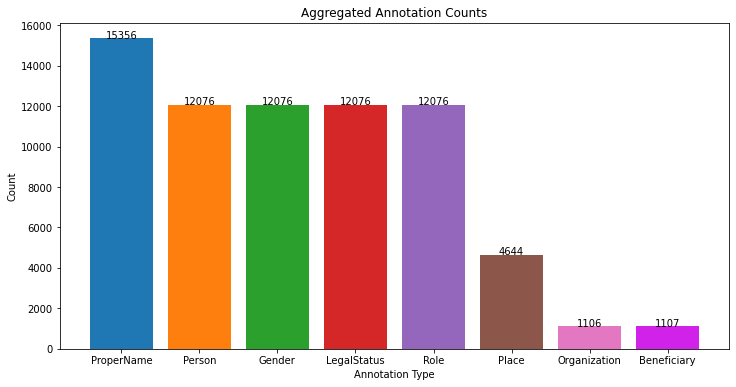

In [119]:
data_path = data_path

# create a dictionary to store the count of each annotation type for each file
type_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}}

# loop through each directory
for i in ['A', 'B', 'C', 'D', 'E']:
    # loop through each .ann file in the directory
    for file_name in [f for f in os.listdir(data_path + i) if f.endswith('.ann')]:
        with open(data_path + i + '/' + file_name, 'r') as f:
            # loop through each line in the .ann file
            for line in f:
                # split the line into its components
                components = line.split('\t')
                if components[0][0] == 'T':
                    # count test-bound annotations
                    type_name = components[1].split()[0]
                    if type_name not in type_counts[i]:
                        type_counts[i][type_name] = 1
                    else:
                        type_counts[i][type_name] += 1
                elif components[0][0] == 'A':
                    # count attribute annotations
                    type_name = components[1].split()[0]
                    if type_name not in type_counts[i]:
                        type_counts[i][type_name] = 1
                    else:
                        type_counts[i][type_name] += 1

# create a dictionary to store the aggregated count of each annotation type
agg_counts = {}

# loop through each directory
for i in ['A', 'B', 'C', 'D', 'E']:
    # loop through each annotation type in the file
    for type_name in type_counts[i]:
        # add the count to the aggregated count
        if type_name not in agg_counts:
            agg_counts[type_name] = type_counts[i][type_name]
        else:
            agg_counts[type_name] += type_counts[i][type_name]

# create a bar chart for the aggregated counts
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(agg_counts.keys(), agg_counts.values(),color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#d122e9'])
ax.set_title('Aggregated Annotation Counts')
ax.set_xlabel('Annotation Type')
ax.set_ylabel('Count')
for i, v in enumerate(agg_counts.values()):
    ax.text(i, v, str(v), color='black', ha='center')
plt.show()

#### LegalStatus

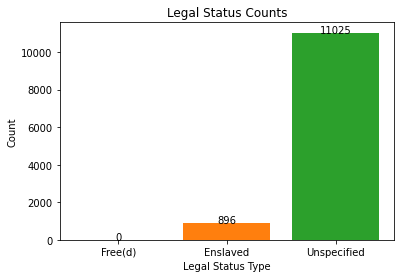

In [121]:
legal_status_counts = {
    'Free(d)': 0,
    'Enslaved': 0,
    'Unspecified': 0
}

# loop through each directory
for i in ['A', 'B', 'C', 'D', 'E']:
    # loop through each .ann file in the directory
    for file_name in [f for f in os.listdir(data_path + i) if f.endswith('.ann')]:
        with open(data_path + i + '/' + file_name, 'r') as f:
        # loop through each line in the .ann file
            for line in f:
                # split the line into its components
                components = line.split('\t')
                if components[0][0] == 'A':
                    # check if the type is LegalStatus
                    if components[1].startswith('LegalStatus'):
                        legal_status_value = components[1].split()[2]
                        if legal_status_value == 'Free(d)':
                            legal_status_counts['Free(d)'] += 1
                        elif legal_status_value == 'Enslaved':
                            legal_status_counts['Enslaved'] += 1
                        elif legal_status_value == 'Unspecified':
                            legal_status_counts['Unspecified'] += 1

# create a bar plot
fig, ax = plt.subplots()
ax.bar(legal_status_counts.keys(), legal_status_counts.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title('Legal Status Counts')
ax.set_xlabel('Legal Status Type')
ax.set_ylabel('Count')
for i, v in enumerate(legal_status_counts.values()):
    ax.text(i, v, str(v), color='black', ha='center')
plt.show()

#### Role

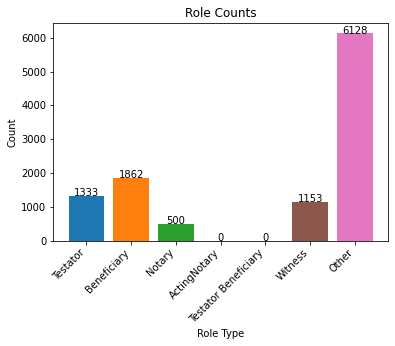

In [122]:
# initialize the role_counts dictionary
role_counts = {
    'Testator': 0,
    'Beneficiary': 0,
    'Notary': 0,
    'ActingNotary': 0,
    'Testator Beneficiary': 0,
    'Witness': 0,
    'Other': 0
}

# loop through each directory
for i in ['A', 'B', 'C', 'D', 'E']:
    # loop through each .ann file in the directory
    for file_name in [f for f in os.listdir(data_path + i) if f.endswith('.ann')]:
        with open(data_path + i + '/' + file_name, 'r') as f:
        # loop through each line in the .ann file
            for line in f:
            # split the line into its components
                components = line.split('\t')
                if components[0][0] == 'A':
                    if components[1].startswith('Role'):
                        role_value = components[1].split()[2]
                        if role_value == 'Testator':
                                role_counts['Testator'] += 1
                        elif role_value == 'Beneficiary':
                                role_counts['Beneficiary'] += 1
                        elif role_value == 'Notary':
                                role_counts['Notary'] += 1
                        elif role_value == 'ActingNotary':
                                role_counts['ActingNotary'] += 1
                        elif role_value == 'Testator Beneficiary':
                                role_counts['Testator Beneficiary'] += 1
                        elif role_value == 'Witness':
                                role_counts['Witness'] += 1
                        elif role_value == 'Other':
                                role_counts['Other'] += 1

# create a bar plot
fig, ax = plt.subplots()
ax.bar(role_counts.keys(), role_counts.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
ax.set_title('Role Counts')
ax.set_xlabel('Role Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(role_counts.values()):
    ax.text(i, v, str(v), color='black', ha='center')
plt.show()

#### Beneficiary

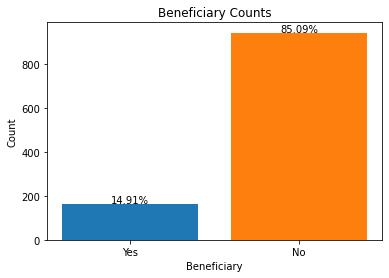

In [164]:
beneficiary_counts = {
    'Yes': 0,
    'No': 0,
}

for directory in ['A', 'B', 'C', 'D', 'E']:
    for filename in os.listdir(data_path + directory):
        if filename.endswith('.ann'):
            with open(os.path.join(data_path, directory, filename), 'r') as f:
                for line in f:
                    components = line.split('\t')
                    if components[0][0] == 'A':
                        if components[1].startswith('Beneficiary'):
                            beneficiary_value = components[1].split()[2]
                            if beneficiary_value == 'Yes':
                                beneficiary_counts['Yes'] += 1
                            elif beneficiary_value == 'No':
                                beneficiary_counts['No'] += 1
                                
# create a bar plot
fig, ax = plt.subplots()
ax.bar(beneficiary_counts.keys(), beneficiary_counts.values(), color=['#1f77b4', '#ff7f0e'])
ax.set_title('Beneficiary Counts')
ax.set_xlabel('Beneficiary')
ax.set_ylabel('Count')
total_count = sum(beneficiary_counts.values())
for i, v in enumerate(beneficiary_counts.values()):
    percentage = round(v / total_count * 100, 2)
    ax.text(i, v + 1, f"{percentage}%", color='black', ha='center')
plt.show()

#### Gender

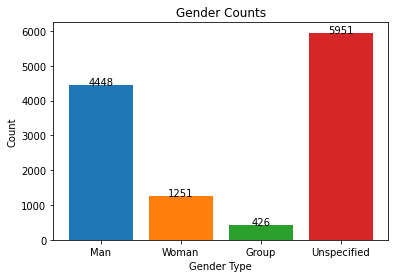

In [110]:
gender_counts = {
    'Man': 0,
    'Woman': 0,
    'Group': 0,
    'Unspecified': 0
}

for directory in ['A', 'B', 'C', 'D', 'E']:
    for filename in os.listdir(data_path + directory):
        if filename.endswith('.ann'):
            with open(os.path.join(data_path, directory, filename), 'r') as f:
                for line in f:
                    components = line.split('\t')
                    if components[0][0] == 'A':
                        if components[1].startswith('Gender'):
                            gender_value = components[1].split()[2]
                            if gender_value == 'Man':
                                gender_counts['Man'] += 1
                            elif gender_value == 'Woman':
                                gender_counts['Woman'] += 1
                            elif gender_value == 'Group':
                                gender_counts['Group'] += 1
                            elif gender_value == 'Unspecified':
                                gender_counts['Unspecified'] += 1

# create a bar plot
fig, ax = plt.subplots()
ax.bar(gender_counts.keys(), gender_counts.values(),color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_title('Gender Counts')
ax.set_xlabel('Gender Type')
ax.set_ylabel('Count')
# add text labels for the count values
for i, v in enumerate(gender_counts.values()):
    ax.text(i, v, str(v), color='black', ha='center')
plt.show()

# Visualization VOC testaments 

In [180]:
# set up stop words
stop_words = stopwords.words('dutch')

# add custom stop words
custom_stop_words = ['den', 'ten', 'ter', 'alle', 'ende', 'des', 'wel', 'sijn', 'uijt', 'ofte', 'zoo', 'off','dien','wille','zijne','zijnde' ] # add any custom stop words here
stop_words.extend(custom_stop_words)

# define function to clean text
def clean_text(text):
    # remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # tokenize text
    tokens = word_tokenize(text)
    # remove stop words, words with only 1 or 2 characters, and numbers
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 2 and not token.isnumeric()]
    # join tokens back into text
    clean_text = ' '.join(filtered_tokens)
    return clean_text

# define function to count words in file
def count_words(filename):
    with open(filename, 'r') as f:
        text = f.read()
        cleaned_text = clean_text(text)
        word_count = Counter(cleaned_text.split())
    return word_count

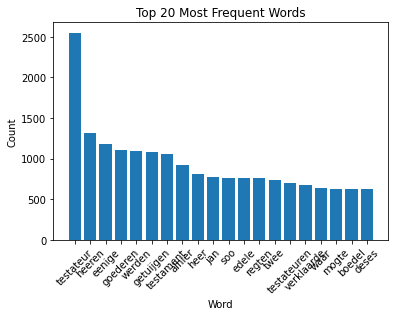

In [181]:
# set up dictionary to hold word counts
word_counts = {}

# loop through all files in directory
for directory in ['A', 'B', 'C', 'D', 'E']:
    for filename in os.listdir(data_path + directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(data_path, directory, filename)
            word_counts[filename] = count_words(filepath)

# combine word counts from all files
all_word_counts = Counter()
for wc in word_counts.values():
    all_word_counts += wc

# get top 20 most frequent words
top_words = all_word_counts.most_common(20)

# create bar plot
fig, ax = plt.subplots()
ax.bar([word[0] for word in top_words], [word[1] for word in top_words])
ax.set_title('Top 20 Most Frequent Words')
ax.set_xlabel('Word')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

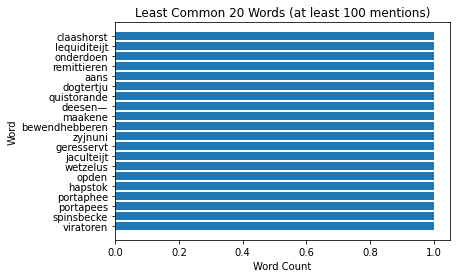

In [182]:
# filter out words that occur less than 100 times
top_words = [word for word, count in all_word_counts.items() if count >= 100 and not word.isdigit() and len(word) > 2]

# get the least common 20 words
least_common_words = all_word_counts.most_common()[:-21:-1]

# create a bar plot
word_counts = [count for word, count in least_common_words]
word_labels = [word for word, count in least_common_words]
fig, ax = plt.subplots()
ax.barh(word_labels, word_counts)
ax.set_title('Least Common 20 Words (at least 100 mentions)')
ax.set_xlabel('Word Count')
ax.set_ylabel('Word')
plt.show()

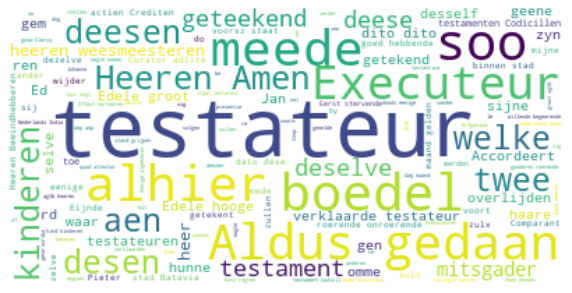

In [188]:
from wordcloud import WordCloud

# create a string with all the text
all_text = ""
for directory in ['A', 'B', 'C', 'D', 'E']:
    for filename in os.listdir(data_path + directory):
        if filename.endswith('.txt'):
            with open(os.path.join(data_path, directory, filename), 'r', encoding='utf-8') as f:
                text = f.read()
                all_text += text

# exclude Dutch stopwords
all_text = ' '.join([word for word in all_text.split() if word.lower() not in stop_words])

# create the WordCloud object
wordcloud = WordCloud(background_color='white', stopwords=stop_words).generate(all_text)

# plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Sentiment Analysis

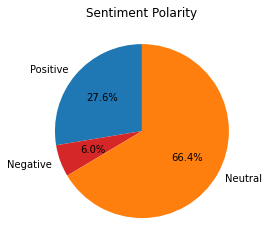

In [168]:
# !pip3 install textblob
from textblob import TextBlob

# initialize counters for sentiment polarity
positive_count = 0
negative_count = 0
neutral_count = 0

# loop through all text files and determine sentiment polarity
for directory in ['A', 'B', 'C', 'D', 'E']:
    for filename in os.listdir(data_path + directory):
        if filename.endswith('.txt'):
            with open(os.path.join(data_path, directory, filename), 'r') as f:
                text = f.read()
                blob = TextBlob(text)
                polarity = blob.sentiment.polarity
                # classify sentiment as positive, negative, or neutral based on polarity threshold
                if polarity > 0.1:
                    positive_count += 1
                elif polarity < -0.1:
                    negative_count += 1
                else:
                    neutral_count += 1

# create a pie chart of sentiment polarity
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#1f77b4', '#d62728', '#ff7f0e']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Sentiment Polarity')
plt.show()